#  Data preprocessing & KNN Model for Telecom customer churn dataset
     # Numerification, Standardization, KNN, GridSearch, Visualization, Balancing and KNN applied to the PCA are all applied to the dataset

    ## Amine Litim 

#### (Conda's non predifined packages are installed within this first cell)

In [1]:
pip install imblearn 

Note: you may need to restart the kernel to use updated packages.


#### (all models and attributes are uploaded in this following cell)

In [2]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

# to import KNN
from sklearn.neighbors import KNeighborsClassifier as knc

# to optimize our parameter K

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# to split data into train - test 
from sklearn.model_selection import train_test_split

# to balance the data
from imblearn.under_sampling import NearMiss

In [3]:
# Uploading the csv file 
churn= pd.read_csv('Telecom Churn Customer.csv', header= 0) 
churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Eliminate N_A values if existing
newchurn = pd.DataFrame.dropna(churn)
newchurn = newchurn.drop(columns=['TotalCharges']) 

In [5]:
newchurn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Quantitative variables only (no dummy variables)

In [6]:
newchurn['Churn'] = pd.get_dummies(newchurn['Churn'])

In [7]:
#quantitative churn table ( qualitative variables excluded) but we keep the column "churn" since it's our target
quant_churn = newchurn [['SeniorCitizen', 'tenure','MonthlyCharges','Churn']]
quant_churn

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,1
1,0,34,56.95,1
2,0,2,53.85,0
3,0,45,42.30,1
4,0,2,70.70,0
...,...,...,...,...
7038,0,24,84.80,1
7039,0,72,103.20,1
7040,0,11,29.60,1
7041,1,4,74.40,0


In [8]:
# X will take all the values of the variables in the tables except 'churn' that will be our dependant variable 

X = quant_churn.iloc[:, :-1].values
y = quant_churn.iloc[:, 3].values

# or we can use the loc attribute with the following code : 
# X= quant_churn.loc[: , quant_churn.columns != 'Churn']
# y= quant_churn['sold']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
#size of our x and y train & test saples ( 5 is the number of variables included in X)
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 3) (1409, 3) (5634,) (1409,)


### Our data is likely to be not on the same scale, there might be some scale differences among dependant variables which affect the accuracy of the prediction and might even affect the process itself. 

### Thus, as a solution that can help us increasing the accuracy of our results, we can standardize the data. 

### In this case, I will be using the 'StandardScaler' attribute from the 'Sklearn.preprocessing' model: 

## Data Standardization: ( scaler )

In [11]:
scaler= preprocessing.StandardScaler().fit(X_train) 
X_train_s= scaler.transform(X_train)


In [12]:
scaler= preprocessing.StandardScaler().fit(X_test) 
X_test_s= scaler.transform(X_test)

### Now that our Data is ready, we can, hopefully get better accuracy than before 

## KNN  APPLICATION 

#### Kneighbors Classifier 

In [13]:
#case of k=1
knn_1 = knc(n_neighbors= 1)
knn_1.fit(X_train, y_train)
accuracy_score(y_test, knn_1.predict(X_test))


0.709013484740951

In [14]:
#case of k=3
knn_3 = knc(n_neighbors= 3)
knn_3.fit(X_train, y_train)
accuracy_score(y_test, knn_3.predict(X_test))

0.7537260468417317

## Creating a model for multiple values of K: We will use the Grid Search CV algorithm

In [15]:
#creating a dictionary for different values of K
params = { 'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] }

In [17]:
#applying the classifier on the list of parameters
gridsearch = GridSearchCV(knc(), params, cv=10) 
gridsearch.fit(X_train_s, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
# detecting the best estimator (k)
gridsearch.best_params_

{'n_neighbors': 13}

In [19]:
#using the optimal k found to predict the tested y through the scaled tested X
optimized_knn= gridsearch.best_estimator_
y_test_pred = optimized_knn.predict(X_test_s)

Text(33.0, 0.5, 'y_test')

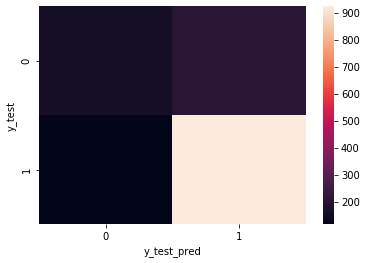

In [20]:
cm= confusion_matrix(y_test, y_test_pred)

%matplotlib inline
plt.figure(figsize=(6,4))
sns.heatmap(cm)
plt.xlabel('y_test_pred')
plt.ylabel('y_test')

In [21]:
accuracy_score(y_test, y_test_pred) 
#optimal accuracy will be now found

0.7721788502484032

## Data Visualization

In [22]:
k_range = range (1,21)
precision = []
for k in k_range:
    knn = knc(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    precision.append(accuracy_score(y_pred,y_test))

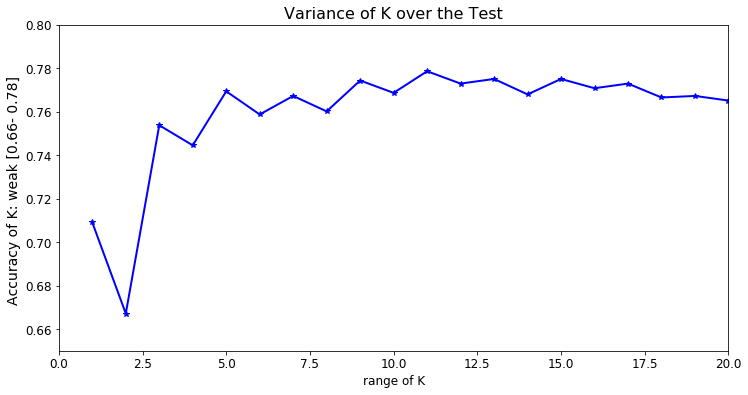

In [23]:
plt.figure(figsize=(12,6)) 

plt.title('Variance of K over the Test', fontsize= 16)
plt.xlabel('range of K', fontsize= 12)
plt.ylabel('Accuracy of K: weak [0.66- 0.78] ', fontsize=14)
 
plt.xticks(fontsize=12)  #the fontsize of the numbers of the X  scale / the numbers size 
plt.yticks(fontsize=12) 

plt.xlim(0,20) # label limits (range of X data)
plt.ylim(0.65,0.8)

plt.plot(k_range, precision, color='blue', linewidth=2, marker='*' )

plt.show()

                                        ####  Optimal K = 11

In [24]:
#case of k=11
knn_11 = knc(n_neighbors= 11)
knn_11.fit(X_train, y_train)
accuracy_score(y_test, knn_11.predict(X_test))

0.7785663591199432

### Either through Grid Search or running over K values through a basic function, the maximum accuracy does not exceed .0778; a humble result

### ========================================================================================

# Now, let's consider both Quantitative and Qualitative variables

### Basically the same process, we just need to to convert qualitative variables into dummy variables and repeat the same steps

In [25]:
del newchurn['customerID']
newchurn= pd.get_dummies(newchurn, drop_first= True)
newchurn

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


### Clean the dataframe (from unnecessary dummies): 

In [26]:
newchurn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   Churn                                  7043 non-null   uint8  
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

## Splitting Data

In [27]:
X1 = newchurn.iloc[:, newchurn.columns != 3 ].values
y1 = newchurn.iloc[:,3].values

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
print( X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(5634, 30) (1409, 30) (5634,) (1409,)


## Data Standardization ( Once again since we updated our dataset by considering categorical variables) 

In [29]:
scaler1= preprocessing.StandardScaler().fit(X1_train) 
X1_train_s= scaler1.transform(X1_train)

In [30]:
scaler1= preprocessing.StandardScaler().fit(X1_test) 
X1_test_s= scaler1.transform(X1_test)


## KNN APPLICATION

#### Kneighbors Classifier

In [31]:
#case of k=1 considering all the variables ( better accuracy than if only numerical variables are considered)
knn_1 = knc(n_neighbors= 1)
knn_1.fit(X1_train_s, y1_train)

y1_pred_knn_1 = knn_1.predict(X1_test_s)
accuracy_score(y1_test, y1_pred_knn_1)

0.9694819020581973

In [32]:
#case_of k=3 considering all the variables ( better accuracy than if only numerical variables are considered)
knn_3 = knc(n_neighbors= 3)
knn_3.fit(X1_train_s, y1_train)
y1_pred_knn_3 = knn_3.predict(X1_test_s)
accuracy_score(y1_test, y1_pred_knn_3 )

0.9815471965933286

 ## The new dataset gives higher accuracy than the first one ==> the more dependant variables we have, the higher accuracy we get

In [33]:
#n_neighbors is the parameter responsible of iterating the Gridsearch over the values 1-30; each time it takes a value
k_values = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] }

In [34]:
grid = GridSearchCV(knc(), k_values) 

In [35]:
# fit the grid with data
grid.fit(X1_train_s, y1_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
grid.best_params_

{'n_neighbors': 8}

 #### optimal K based on the GridSearch = 8

In [37]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [38]:
optimized_knn= grid.best_estimator_

In [39]:
y1_test_pred = optimized_knn.predict(X1_test_s)

Text(33.0, 0.5, 'y1_test')

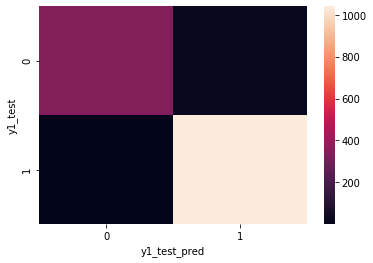

In [40]:
cm2=  confusion_matrix(y1_test, y1_test_pred)

%matplotlib inline
plt.figure(figsize=(6,4))
sns.heatmap(cm2)
plt.xlabel('y1_test_pred')
plt.ylabel('y1_test')

In [41]:
accuracy_score(y1_test, y1_test_pred) 

0.9836763662171752

### * Our new accuracy score is so close to 1 , thus, much better then the accuracy score we get without Data Standardization

### * Also, the 'Grid Seach' Algorithm helped us get the optimal accuracy score over the series of K values in a very short time, which is very useful when dealing with a wide range of k-neighbors values.  

### * On the on the other hand, we can visualize the optimal value of K using a typical counter-based function that runs over the different values of K (1-20), which might give a different optimal K than the GridSearch Method

## Visualization : 

In [42]:
k_range = range (1,21)
precision = []
for k in k_range:
    knn = knc(n_neighbors = k)
    knn.fit(X1_train_s,y1_train)
    y1_pred = knn.predict(X1_test_s)
    precision.append(accuracy_score(y1_pred,y1_test))


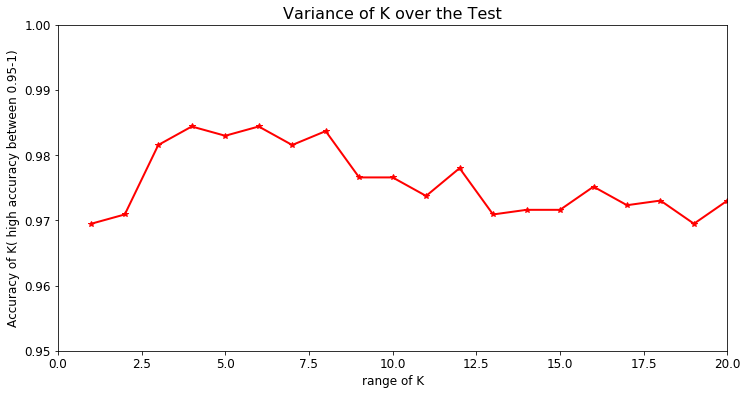

In [43]:
plt.figure(figsize=(12,6))
plt.title('Variance of K over the Test', fontsize= 16)
plt.xlabel('range of K', fontsize= 12)
plt.ylabel('Accuracy of K( high accuracy between 0.95-1)', fontsize=12)
 
plt.xticks(fontsize=12)  #the fontsize of the numbers of the X  scale / the numbers size 
plt.yticks(fontsize=12) 

plt.xlim(0,20) # label limits (range of X data)
plt.ylim(0.95,1)

plt.plot(k_range, precision, color='red', linewidth=2, marker='*')

plt.show()

### The Optimal K provided by the second Algorithm is k=4 and it's correspondant accuracy is: 

In [44]:
knn_4 = knc(n_neighbors= 4)
knn_4.fit(X1_train_s, y1_train)
y1_pred_knn_4 = knn_4.predict(X1_test_s)
accuracy_score(y1_test, y1_pred_knn_4 )

0.9843860894251242

#### it is even better than the result we've got based on the Grid search; 0.9843 > 0.9836 

### ===================================================================================

### The result is so far good enough, however , our data Set seems to be imbalanced with a big number of dimensions included ( 30 ), so for the coming section, I will try to balance the data and apply the Principal Component Analysis (PCA) to adjust the number of dimensions included in the KNN Algorithm Process:

Text(0, 0.5, 'Frequency')

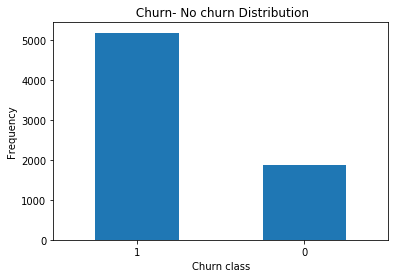

In [45]:
    count_classes= pd.value_counts(newchurn['Churn'], sort=True)
    
    count_classes.plot(kind= 'bar', rot=0) 
    
    plt.title(' Churn- No churn Distribution')
    plt.xticks(range(2))
    plt.xlabel('Churn class')
    plt.ylabel('Frequency')
    

In [46]:
## get the no churn and churn dataset
no_churn= newchurn[newchurn['Churn']==0]
churn= newchurn[newchurn['Churn']==1]

In [47]:
print( no_churn.shape, churn.shape) 

(1869, 30) (5174, 30)


In [48]:
print( X1.shape, y1.shape)

(7043, 30) (7043,)


In [49]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [50]:
# implementing undersampling for handling Imbalanced variables
nm= NearMiss()
X1_res, y1_res= nm.fit_sample(X1,y1)

### old data:

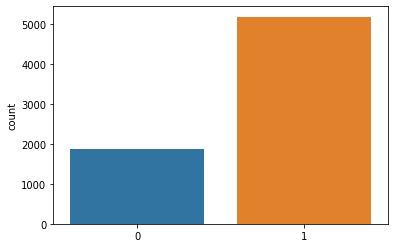

In [51]:

sns.countplot(y1)

### New data:

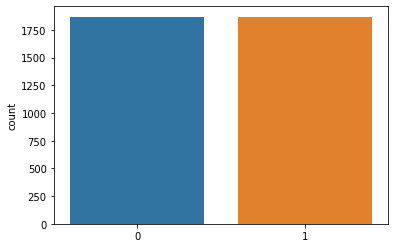

In [52]:
sns.countplot(y1_res)

### Now, Let's apply PCA (Principal Component Analysis) to Our data in order to reduce the number of dimentions of the dependant variables so that, hopefully we can get more accurate results when we apply KNN

In [53]:
pca = PCA(n_components=2)
pca.fit(X1_res)
X_pca = pca.transform(X1_res)
print("original shape:   ", X1_res.shape)
print("transformed shape:", X_pca.shape)

original shape:    (3738, 30)
transformed shape: (3738, 2)


### Now that we have reduced the nbr of dimensions to 2 instead of 30, we do split the data and re-apply KNN 

In [54]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_pca, y1_res, test_size=0.2, random_state=0)
print( X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(2990, 2) (748, 2) (2990,) (748,)


In [55]:
k_range = range (10,41)
precision2 = []
for k in k_range:
    knn = knc(n_neighbors = k)
    knn.fit(X2_train, y2_train)
    y2_pred = knn.predict(X2_test)
    precision2.append(accuracy_score(y2_pred,y2_test))

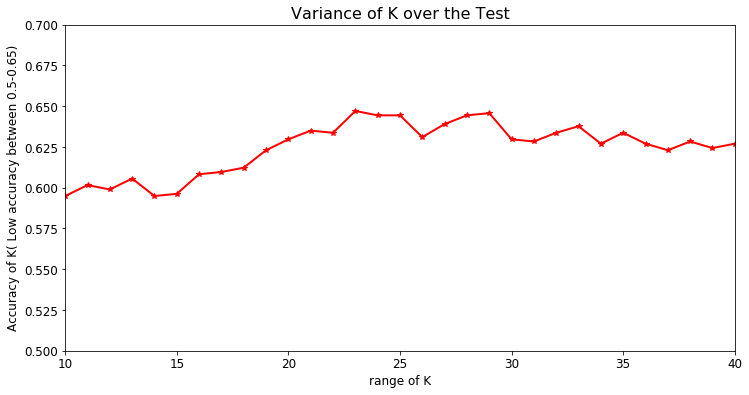

In [56]:
plt.figure(figsize=(12,6))
plt.title('Variance of K over the Test', fontsize= 16)
plt.xlabel('range of K', fontsize= 12)
plt.ylabel('Accuracy of K( Low accuracy between 0.5-0.65)', fontsize=12)
 
plt.xticks(fontsize=12)  #the fontsize of the numbers of the X  scale / the numbers size 
plt.yticks(fontsize=12) 

plt.xlim(10,40) # label limits (range of X data)
plt.ylim(0.5,0.7)

plt.plot(k_range, precision2, color='red', linewidth=2, marker='*')

plt.show()

Text(33.0, 0.5, 'y2_test')

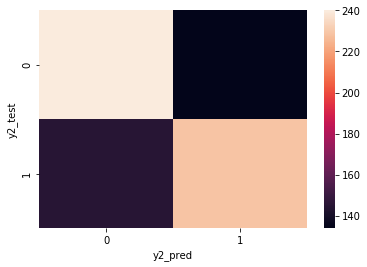

In [57]:
cm3=  confusion_matrix(y2_test, y2_pred)

%matplotlib inline
plt.figure(figsize=(6,4))
sns.heatmap(cm3)
plt.xlabel('y2_pred')
plt.ylabel('y2_test')

In [58]:
accuracy_score(y2_test, y2_pred)

0.6270053475935828

### Our optimal K in after Balancing and PCA is k=23 with a degree of accuracy = 0.65 only ( Too Low )
### Thus the results we've got before applying the PCA and Balancing the data are much better and should be kept   
    ( accuracy = 0.98 for k=8 )

### ==> The best results and the ones we should keep are KNN applied to whole variables (Categorical and Numerical) with applying either a basic optimal-K algorithm detector or Grid Search CV as a second best choice, in order to get a level of accuracy = 0.98